NOMS I COGNOMS: Antonio Tigri Valdivia & Andreu Vall Hernàndez

GRUP: F

# Naive Bayes i Classificació

En aquest quart lliurament es programarà un classificador, que donat un tweet el categoritzarà en una de les possibles classes. En aquesta ocasió, implementareu un classificador amb tweets de cyber bullying.


**Què s’ha de fer?**

Volem classificar tweets segons a quin tipus de cyber bullying pertanyen. Així doncs, a partir de tots els tweets que tenim, crearem un vector de característiques que ens descrigui cadascun. Finalment desenvoluparem un classificador probabilístic del tipus Naive Bayes que ens permeti identificar a quina classe de cyber bullying pertany un tweet donat segons les característiques triades.


**Quina és la idea del sistema de classificació que s’ha de desenvolupar?**

El classificador és un concepte de l'aprenentatge automàtic supervisat. L'objectiu del classificador és donat un vector de característiques que descriuen els objectes que es volen classificar indicar a quina categoria o classe pertanyen d'entre un conjunt predeterminat. 

El procés de classificació consta de dues parts: 
(a) el procés d'aprenentatge i 
(b) el procés d'explotació o testeig. 
El procés d'aprenentatge rep exemples de parelles $(x,y)$ on $x$ són les característiques, usualment nombres reals, i $y$ és la categoria a la que pertanyen. 
Aquest conjunt se'l coneix com a conjunt d'entrenament i ens servirà per trobar una funció $\hat{y}=h(x)$ que donada una $x$ aconsegueixi que $\hat{y}=y$. Per altra banda el procés de testeig aplica la funció $h(x)$ apresa a l'entrenament a una nova descripció per veure quina categoria li correspon.


**Classificació i llenguatge natural**

La descripció dels exemples en característiques és el punt més crític de tot sistema d'aprenentatge automàtic. 
Una de les representacions més simples per tal de descriure un text és la representació *bag-of-words*.
Aquesta representació converteix un text en un vector de $N$ paraules. 
Consisteix en seleccionar un conjunt d'$N$ paraules i per cada paraula comptar quants cops apareix en el text. 
Una versió alternativa d'aquest procés pot ser simplement indicar si apareix o no en el text.

## Abans de començar


**\+ Durant la pràctica, solament es podran fer servir les següents llibreries**:

`Pandas, Numpy` i `NLTK`

*Nota: A més de les que ja es troben presents en la 1a cel·la i funcions natives de Python*

**\+ No es poden modificar les definicions de les funcions donades, ni canviar els noms de les variables i paràmetres ja donats**

Això no implica però que els hàgiu de fer servir. És a dir, que la funció tingui un paràmetre anomenat `df` no implica que l'hàgiu de fer servir, si no ho trobeu convenient.

**\+ En les funcions, s'especifica que serà i de quin tipus cada un dels paràmetres, cal respectar-ho**

Per exemple (ho posarà en el pydoc de la funció), `df` sempre serà indicatiu del `Pandas.DataFrame` de les dades. Durant els testos, els paràmetres (i específicament `df`) no contindran les mateixes dades que en aquest notebook, si bé si seran del mateix tipus! Per tant, no us refieu de què tinguin, per exemple, el mateix nombre de files.

## Més informació del dataset

El 15 d'Abril de 2020, UNICEF va llançar una alarma com a resposta de l'augment de risc de cyberbullying durant la pandèmia COVID-19. Les estadístiques són prou alarmants: un 36.5% dels estudiants de l'escola fins a l'institut s'han sentit víctimes del cyberbullying i un 87% l'han observat, amb efectes que van des d'una disminució de resultats acadèmics fins a pensaments suïcides.

Amb l'objectiu d'ajudar a l'analisis de la situació, s'ha construit un dataset que conté més de 47000 tweets etiquetats d'acord amb la classe de cyberbullying que s'està donant:

1. Age;
2. Ethnicity;
3. Gender;
4. Religion;
5. Other type of cyberbullying;
6. Not cyberbullying

Les dades han estat balancejades per tal de contenir aproximadament 8000 mostres de cada classe.

# Preparar les dades

## Llegim dades

In [176]:
import pandas as pd
import numpy as np

In [177]:
df = pd.read_csv('data/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [178]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

## Dividim dataset

Dividim els tweets en un conjunt d'entrenament, *train*, i en un conjunt de validació, *test*, per tal de poder entrenar i validar el nostre model de ML.

In [179]:
from sklearn.model_selection import train_test_split

df_tweets_train, df_tweets_test = train_test_split(df, test_size=0.2)

Com les dades estaven balancejades originalment, podem observar que la distribució de cadascuna de les classes es manté:

In [180]:
df_tweets_train['cyberbullying_type'].value_counts()

gender                 6430
religion               6421
age                    6393
ethnicity              6348
not_cyberbullying      6332
other_cyberbullying    6229
Name: cyberbullying_type, dtype: int64

# Implementació

Dividirem el notebook en 3 seccions que es complementen una a l'altra:

1. Anàlisis de dades: Informació bàsica sobre els tweets
2. Processament de les dades: Creació d'un vector de característiques a partir dels tweets
3. Classificació amb Naive Bayes

### 1. Anàlisis de dades

El primer que haurem de fer és analitzar les dades per veure una mica com són. El que us proposem és fer una sèrie de plots per observar dades com ara:

* quants tweets s'estan dirigint a una persona en concret
* quants hastags hi ha a cada categoria de tweets
* quants tweets hi ha de cada categoria
* quants tweets de la categoria "not_cyberbullying" és dirigeixen a un usuari vs totes les altres categories
* altres coses que penseu que poden ser rellevants

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df_tweets_train.head()

,tweet_text,cyberbullying_type
5141,@JoeWillman hahaga just like me then! You not ...,not_cyberbullying
21147,Hate is not welcomed in the Emirates unless it...,religion
7441,Kat &amp; Andre are a bunch of stupid gutless ...,not_cyberbullying
15716,"It’s because, from personal experience, “femal...",gender
36509,Just let people be who they want! This bullshi...,age


In [74]:
df_tweets_train['cyberbullying_type'].value_counts()

gender                 6417
age                    6403
ethnicity              6391
religion               6383
not_cyberbullying      6320
other_cyberbullying    6239
Name: cyberbullying_type, dtype: int64

#### **EXERCICI 1:** FEU EL VOSTRE ANALISIS DE DADES AQUÍ

In [103]:
from wordcloud import WordCloud, ImageColorGenerator
from io import BytesIO
from PIL import Image
import requests

# Per visualitzar algunes coses per categoria, enlloc de simplement utitlitzar un
# gràfic de barres hem decidit utilitzar un WordCloud, ja que és una manera que
# permet representar més dades i és més divertida d'analitzar. La grandària de
# les paraules és proporcional a la freqüència corresponent.

def generate_worcloud(image_url, text):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    image_array = np.array(image)

    wc = WordCloud(max_words=200, mask=image_array)
    wc.generate(text)
    
    return wc, ImageColorGenerator(image_array)

urls = {
    'religion': 'https://media.istockphoto.com/id/659949492/vector/christian-cross-icon.jpg?b=1&s=612x612&w=0&k=20&c=bXFUckJ8SSDPdUanofF_yR7KvmGx1WZmQPERjxd1oN0=',
    'ethnicity': 'https://thumbs.dreamstime.com/b/different-color-hands-ethnicity-hands-symbol-flat-isometric-ic-different-color-hands-ethnicity-hands-symbol-flat-isometric-icon-97239931.jpg',
    'gender': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Combotrans.svg/1200px-Combotrans.svg.png',
    'age': 'https://media.istockphoto.com/id/1178790725/vector/children-icon.jpg?s=612x612&w=0&k=20&c=_ggpEjkGoyF9pDwJBOvCSrfpPSDgGzdUaRJCcKIrYGE=',
    'other_cyberbullying': 'https://www.internetmatters.org/connecting-safely-online/wp-content/uploads/sites/2/2020/06/Parents-Cyberbullying.png',
    'not_cyberbullying': 'https://m.media-amazon.com/images/I/41mPKBwTv6L._AC_.jpg'
}

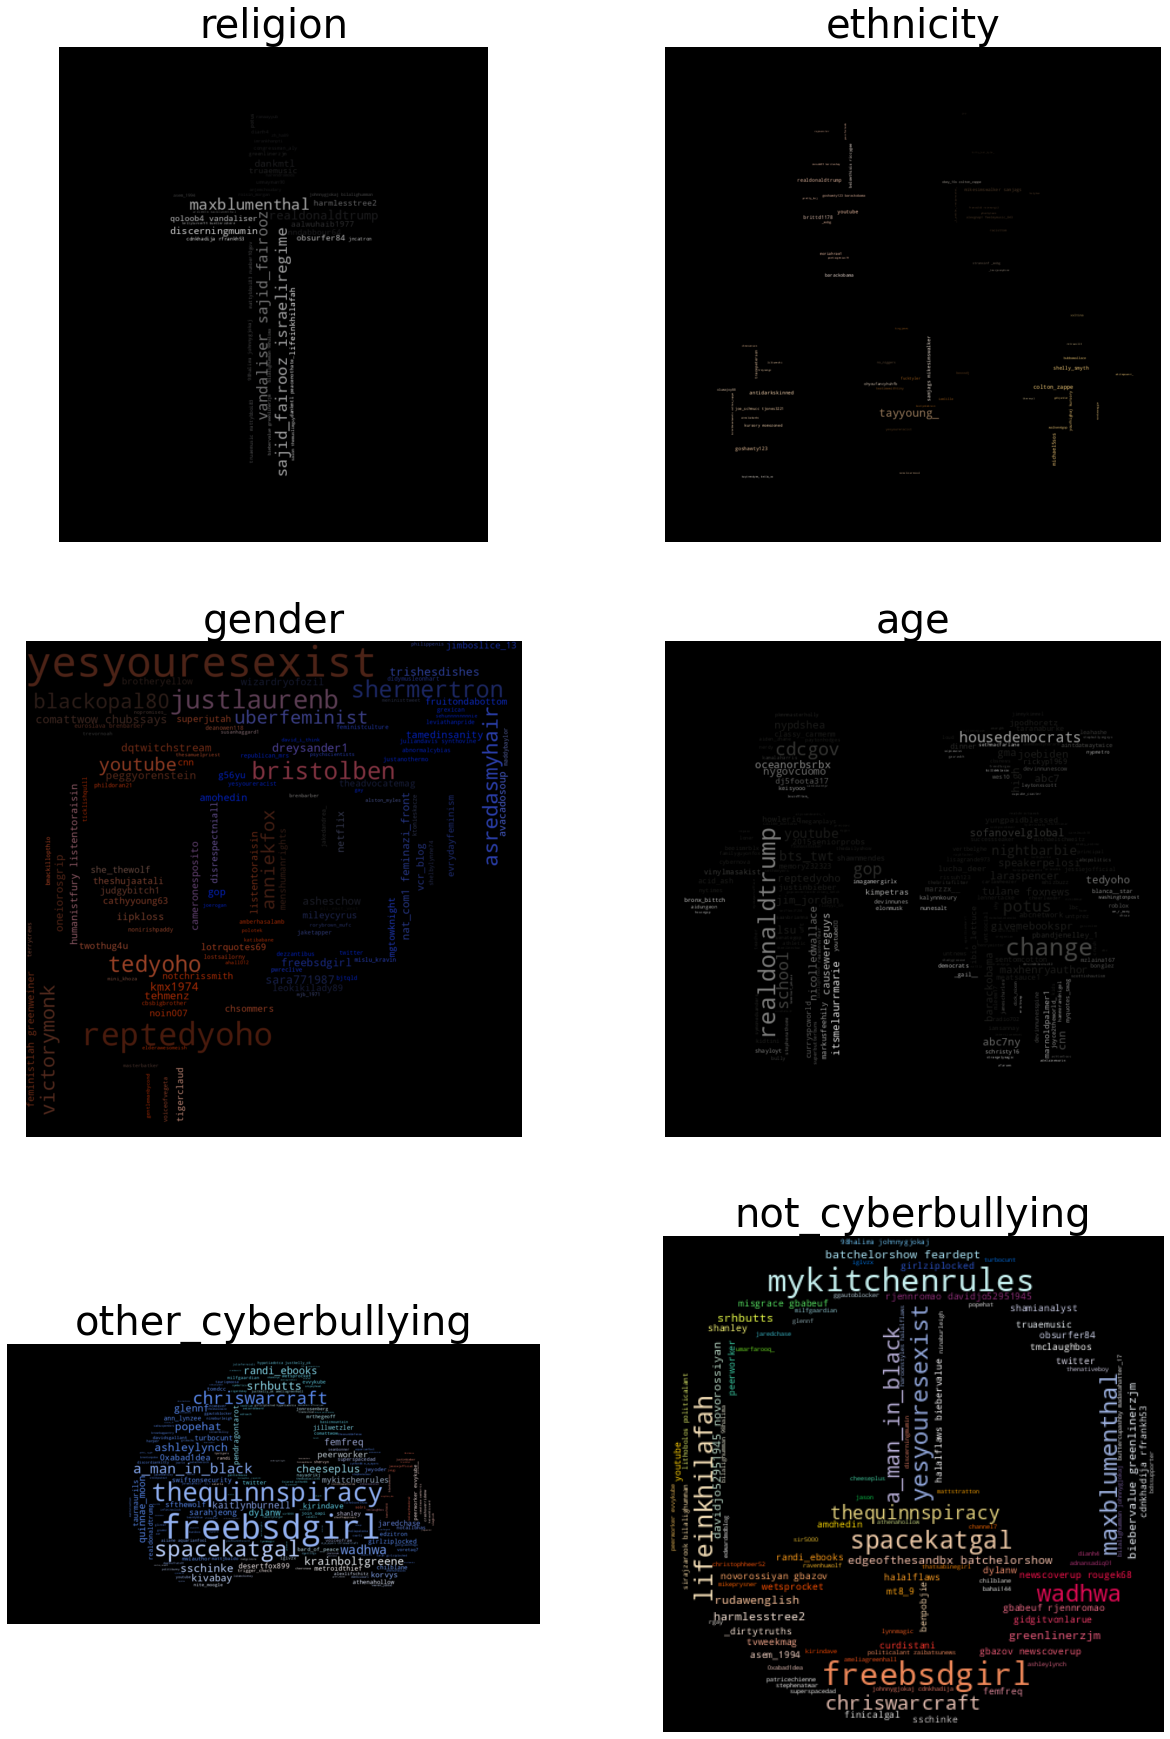

In [ ]:
# Perones més mencionades per cada categoria (en forma de WordCloud enlloc de simplement un gràfic)

df_tweets_train['person_list'] = df_tweets_train['tweet_text'].str.lower().str.findall(r'\@\w+')
fix, axs = plt.subplots(3, 2, figsize=(21, 21 * 3 // 2))
for ax, (category, url) in zip(axs.flatten(), urls.items()):
    wc, image_colors = generate_worcloud(url, ' '.join(df_tweets_train.groupby('cyberbullying_type')['person_list'].sum()[category]))
    ax.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    ax.axis("off")
    ax.set_title(category, fontsize=40)

plt.show()

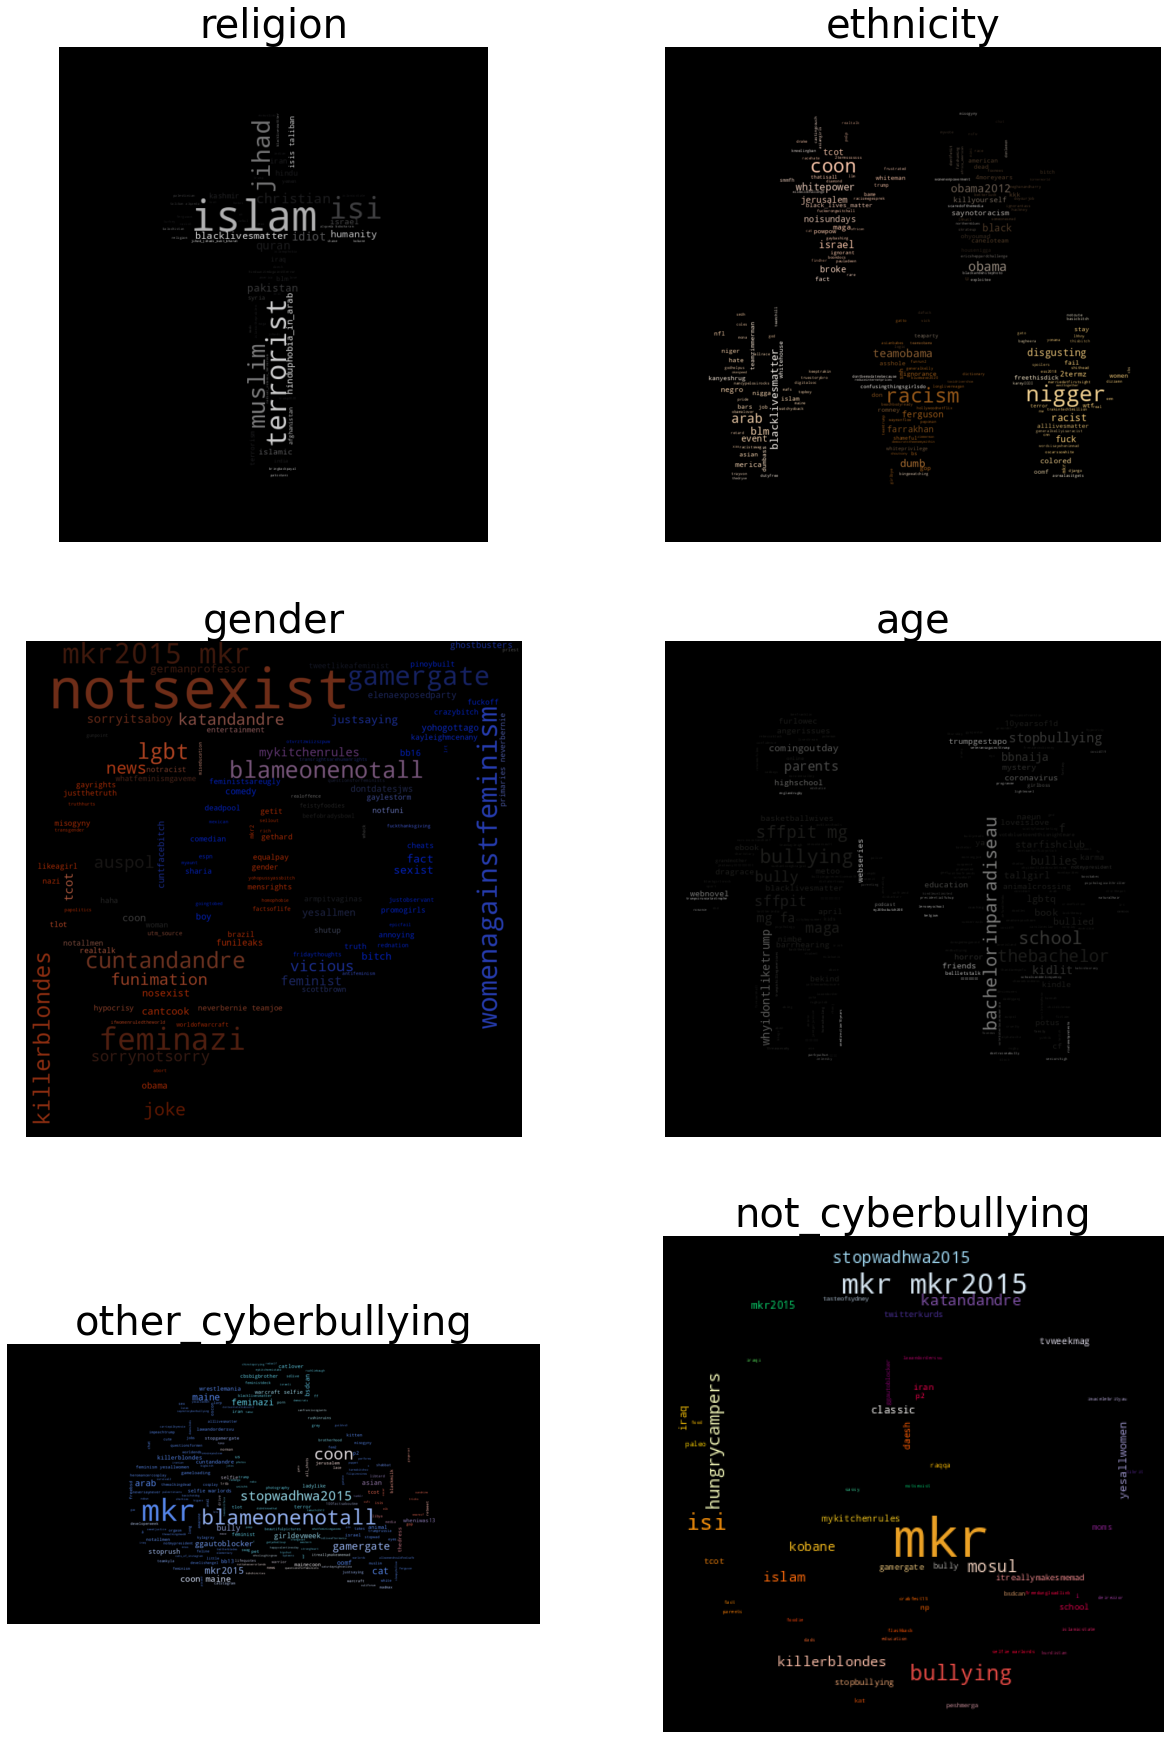

In [104]:
# Hashtags més usats per cada categoria

df_tweets_train['hashtag_list'] = df_tweets_train['tweet_text'].str.lower().str.findall(r'\#\w+')
fix, axs = plt.subplots(3, 2, figsize=(21, 21 * 3 // 2))
for ax, (category, url) in zip(axs.flatten(), urls.items()):
    wc, image_colors = generate_worcloud(url, ' '.join(df_tweets_train.groupby('cyberbullying_type')['hashtag_list'].sum()[category]))
    ax.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    ax.axis("off")
    ax.set_title(category, fontsize=40)

plt.show()

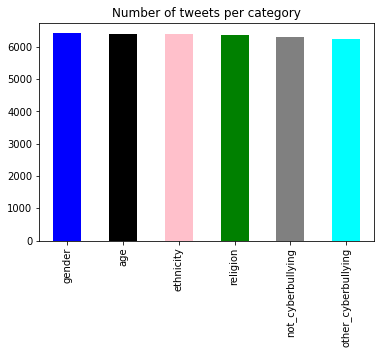

In [127]:
# Número de tweets per cada categoria, que surten pràcticament totes iguals

df_tweets_train['cyberbullying_type'].value_counts().plot(kind='bar', color=['blue', 'black', 'pink', 'green', 'gray', 'cyan'])
plt.title('Number of tweets per category')
plt.show()

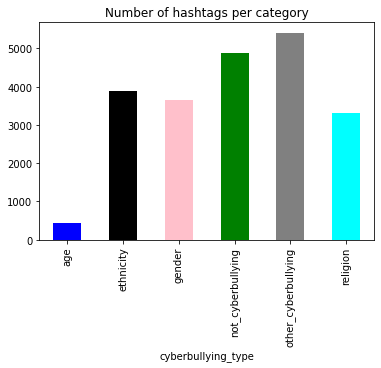

In [133]:
# Número de hashtags per cada categoria

df_tweets_train.groupby('cyberbullying_type')['hashtag_list'].sum().str.len() \
        .plot(kind='bar', color=['blue', 'black', 'pink', 'green', 'gray', 'cyan'])
plt.title('Number of hashtags per category')
plt.show()

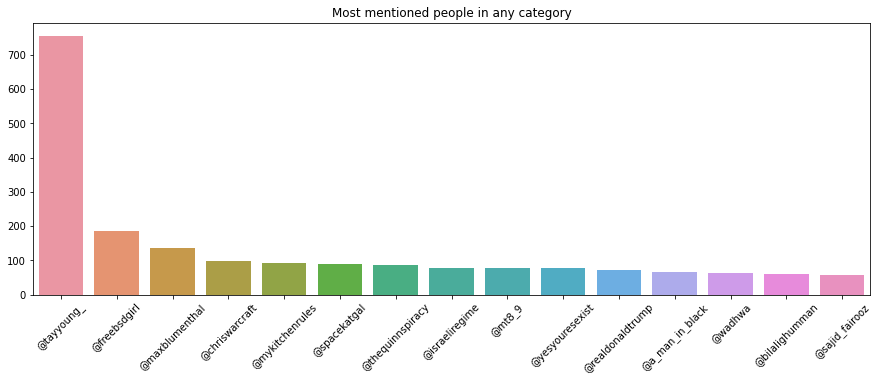

In [131]:
import seaborn as sns
from collections import Counter

a = Counter(df_tweets_train['person_list'].sum()).most_common()[:15]
plt.figure(figsize=(15, 5))
sns.barplot(x=[x[0] for x in a], y=[x[1] for x in a])
plt.xticks(rotation=45)
plt.title('Most mentioned people in any category')
plt.show()

### Comptar paraules

El primer que haurem d'implementar és la funció *normalize* que normalitzarà les paraules.


No modificar la següent cel·la, s'encarrega de fer el proce

In [182]:
def memo(f):
    class memodict(dict):
        def __init__(self, f):
            self.f = f
        def __call__(self, *args):
            return self[args]
        def __missing__(self, key):
            ret = self[key] = self.f(*key)
            return ret
    return memodict(f)

#### **EXERCICI 2:** 

Empleneu la funció següent que, donada una paraula, la normalitzi passant tots els digits a minúscules.

In [183]:
@memo    
def normalize(word):
    """
    Funció que donada una paraula la normalitzi
    Exemple: Taller DELS noUS USOS ---> tallers dels nous usos
    
    :param word: paraula a normalitzar
    :return : paraula normalitzada
    """

    # Afortunadament, ja disposem d'una funció de python que fa el que se'ns demana
    return word.lower()

#### **EXERCICI 3:** 

Feu una funció que construeixi un diccionari que contingui totes les paraules que s'han trobat tot indicant el total de cops que ha aparegut cadascuna i el nombre de tweets on apareix. Més a baix teniu un exemple de l'estructura que ha de tenir el output de la funció.

In [184]:
from collections import Counter
import re

def count_words(df):
    """
    Funció que ha de construir un diccionari que contingui totes les paraules que s'han trobat indicant
    el total de cops que ha aparegut i el nombre de tweets on apareix
    
    :param df: DataFrame amb els tweets i la informació associada
    :return : Diccionari amb el format {word : {n_ocur: valor, n_tweets: valor}, ...}
    """

    '''
    Per fer els diccionaris primer hem fet una copia del dataframe per no modificar-lo, ja que només volem
    retornar un diccionari i hem afegit dues columnes, una que usarem per comptar totes les ocurrències de
    cada paraula i una altra que servirà per comptar en quants tweets apareix cada paraula. Per fer el primer
    hem afagat cada tweet i l'hem convertit en una llista separant per diferents separadors. Probablement ens
    haguem deixat algun separador o hi hagi alguns ambigus com "'" però no veiem necessari anar tant al detall.
    També hem normalitzat prèviament les paraules per no tenir múltiples versions del que en realitat és la
    mateixa paraula.

    Després hem fet un Counter per cada llista, obtenint així una columna on cada element és un diccionari on
    les claus són les paraules del tweet i els valors el número d'ocurrències. Obtenir la segona columna és
    fàcil a partir de la primera, només hem fet un set a partir de les claus del diccionari.

    Per com és l'output demanat, hem vist precís crear dos counters, un per les ocurrències i un altre pel
    nombre de tweets. Després amb els dos muntarem el diccionari de paraules resultat. Iterant sobre cada
    una de les dues columnes i actualitzant els counters prèviament mencionats amb els valors de les columnes.
    Després iterem una última vegada per totes les paraules (o claus de qualsevol dels dos Counters) i muntes
    l'output.

    Hem intentat evitar utilitzar bucles, però totes les coses que hem intentan o no han funcionat o eren més
    ineficients que els bucles que hem afegit. Com la funció triga @2s en executar-se hem considerat que no és
    un problema usar-los en aquest cas en particular.
    '''

    word_dicc = dict()
    occurrences_counter = Counter()
    tweets_counter = Counter()

    df['word_occurrences'] = df['tweet_text'].apply(
                                    lambda x: Counter(list(map(normalize, re.split(' |,|\.|;|\?|\n|\"|\*', x)))))
    df['unique_words'] = df['word_occurrences'].apply(lambda x: set(x.keys()))

    for key, value in df['unique_words'].iteritems():
        tweets_counter.update(value)

    for key, value in df['word_occurrences'].iteritems():
        occurrences_counter.update(value)
    
    for key in occurrences_counter.keys():
        word_dicc[key] = {'n_ocur': occurrences_counter[key], 'n_tweets': tweets_counter[key]}
    
    return word_dicc

In [185]:
dicc_text = count_words(df_tweets_train)
print (len(dicc_text))

66535


In [186]:
dicc_text

{'u': {'n_ocur': 3408, 'n_tweets': 2396},
 'can': {'n_ocur': 2107, 'n_tweets': 1981},
 'only': {'n_ocur': 1348, 'n_tweets': 1287},
 'imagine': {'n_ocur': 148, 'n_tweets': 140},
 'it': {'n_ocur': 6559, 'n_tweets': 5460},
 'will': {'n_ocur': 1830, 'n_tweets': 1625},
 'never': {'n_ocur': 1246, 'n_tweets': 1174},
 'happened': {'n_ocur': 207, 'n_tweets': 199},
 'in': {'n_ocur': 11963, 'n_tweets': 9732},
 'future': {'n_ocur': 78, 'n_tweets': 76},
 'but': {'n_ocur': 5161, 'n_tweets': 4797},
 'still': {'n_ocur': 1148, 'n_tweets': 1094},
 'its': {'n_ocur': 716, 'n_tweets': 663},
 'ur': {'n_ocur': 1240, 'n_tweets': 1044},
 'choice': {'n_ocur': 99, 'n_tweets': 97},
 'if': {'n_ocur': 3397, 'n_tweets': 3098},
 'dont': {'n_ocur': 468, 'n_tweets': 422},
 'know': {'n_ocur': 1853, 'n_tweets': 1724},
 'i': {'n_ocur': 16470, 'n_tweets': 10841},
 'wanna': {'n_ocur': 279, 'n_tweets': 266},
 'tell': {'n_ocur': 582, 'n_tweets': 561},
 'something': {'n_ocur': 526, 'n_tweets': 511},
 'that': {'n_ocur': 9374, '

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    'memory' : {'n_ocur': 88, 'n_tweets': 76},
    'best': {'n_ocur': 123, 'n_tweets': 65},
    ...
}
```

### Contar paraules per cada categoria de tweet

In [187]:
df_tweets_train.head()

,tweet_text,cyberbullying_type,word_occurrences,unique_words
17059,U can only imagine it it will never happened i...,religion,"{'u': 4, 'can': 2, 'only': 1, 'imagine': 2, 'i...","{against, still, that, pakistanis, happened, c..."
12397,"Not sure yet how I feel about #Vicious, love t...",gender,"{'not': 1, 'sure': 1, 'yet': 1, 'how': 1, 'i':...","{, no, love, how, jokes, style, updating-tired..."
14358,RT @EvanSutton96: Now I'm not sexist but there...,gender,"{'rt': 1, '@evansutton96:': 1, 'now': 1, 'i'm'...","{that, world, man!!, always, @evansutton96:, p..."
15507,Sweetheart gay /lesbian jokes are just as bad ...,gender,"{'sweetheart': 1, 'gay': 1, '/lesbian': 1, 'jo...","{, this, sexuality, that, country, just, is, c..."
28696,@DataFran i have other experiences that are no...,other_cyberbullying,"{'@datafran': 1, 'i': 1, 'have': 1, 'other': 1...","{, fine, of, the, that, other, have, @datafran..."


#### **EXERCICI 4:** 

Fent servir la funció que se us dona a continuació (eachTopic), apliqueu-la per tal de comptar les paraules que s'han trobat i la seva ocurrència segregant ara per categoria.

In [188]:
def count_words_categories(df):
    """
    Funció que ha de constuir un diccionari que conté la freqüència de les 
    paraules i el número de tweets on ha aparegut. 
    Aquesta informació ha de ser dividida per diferents categories de cyberbullying.
    
    :param df: DataFrame amb els tweets i la informació associada
    :return : Diccionari amb el format {label : {word : {n_ocur: valor, n_news: valor} } }
    """

    '''
    La funció eachTopic ja ens guia bastant al que hem de fer. Només necessitem cridat la
    funció per a cada tipus de cyberbullying. "group" és doncs, un dataframe on s'han filtrat
    else tweets per tipus de cyberbullying. Amb indexació booleana ho podem fer fàcilment.

    Cal mencionar que per com hem fet (i com demanava) l'exercici anterior el diccionari a
    retornar, la clau n_news la hem canviada per n_tweets (que també té més sentit)
    '''

    words_topic = {}
    
    def eachTopic(group):
        # Count words on this topic and save to dictionary
        words_topic[group['cyberbullying_type'].iloc[0]] = count_words(group.copy())

    # Group by topics and apply function to each topic
    for cb_type in df['cyberbullying_type'].unique():
        eachTopic(df[df['cyberbullying_type'] == cb_type])
    
    return words_topic

In [189]:
words_categories = count_words_categories(df_tweets_train)
print(len(words_categories))

6


El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    'ethnicity': {
        'race' : {'n_ocur': 88, 'n_tweets': 76},
        'what': {'n_ocur': 123, 'n_tweets': 65}
        ...
    },
    ...
    'gender': {
        'jokes' : {'n_ocur': 18, 'n_tweets': 17},
        'you': {'n_ocur': 154, 'n_tweets': 66}
    }
    ...
}
```

### Paraules més freqüents als tweets


**El problema de com escollir el vector de carecterístiques**

L'elecció de les paraules que formen el vector de característiques és un pas crític. En funció de com de bona sigui aquesta descripció, millor funcionarà el sistema. Tot i que us deixem a vosaltres la política de creació del vector de característiques us donem una pista: per saber quines paraules fer servir una possible estratègia és agafar aquelles paraules que apareixen entre en un 10 i un 50 percent del total (sense tenir en compte la categoria). 

Podeu experimentar variant aquests valors.

#### **EXERCICI 5:** 

Experimenteu omplint la llista *skip_top* amb aquelles paraules que penseu no tenen significat o relevancia per definir cada categoria. Podeu buscar informació sobre **stop words** a internet i definir varies llistes fins que penseu que obteniu una bona representació de paraules per categoria de cyberbullying.

In [190]:
skip_top = ("hi", "bye", "the", "a", "to", "do", '', 'is', 'of', 'but', 'it', 'have', 
            'you', 'in', 'i', 'http://t', 'that', '#mkr', 'and', 'not', 'are', 'don\'t',
            'for', 'been', 'on', 'with', 'like', 'me', 'just', 'as', 'or', 'rt', 'about',
            'be', 'they', 'i\'m', 'was', 'at', 'he', 'this', 'all', 'if', 'call', 'being',
            'who', 'make', 'when', 'so', 'my', 'your', 'think', 'funny', '&amp', 'an', 
            'them', 'her', 'can', 'get', 'no', 'https://t', 'it\'s', 'how', 'what', 'people'
            'out', 'how', 'we', 'up', 'know', 'from', 'now', 'one', 'why', 'by', 'would', 
            '-', 'i\'ve', 'has', 'because', 'making', 'she', 'made', 'his', 'out', 'makes', 
            'should', 'say', 'she', 'people', 'out', 'where', 'some', ':)', ':p', 'more', 'am',
            'going', 'will', 'want', 'see', "that's", 'go', 'still', 'u', 'their', 'there',
            'against', 'only', 'were', 'got', 'had', 'then', 'really', 'never', 'even', 'said',
            'also', 'it’s', 'him', 'i’m', 'these', 'same', 'other', 'did', 'into', 'don’t',
            'always', 'back', 'went', 'every', 'way', 'those', 'used', 'too', 'day', 'everyone',
            'than', 'over', 'after', 'getting', 'ur', 'called', 'first', 'anything', '@tayyoung_:',
            'que', 'é', 'de', 'oh', "you're", "can't", '!', 'much', '@freebsdgirl', 'off', 'well',
            'things', 'o', 'e')

def topNwords(df, words, N, skip=[]):
    """
    Funció que crea un diccionari amb les N paraules més representatives 
    (les que apareixen amb més freqüència) de cadascuna de les categories de cyberbullying.
    
    Tingueu en compte que també haureu de filtrar aquelles paraules que apareixen en la majoria 
    de tweets, així com també, les que únicament apareixen en un conjunt molt petit de tweets
    
    :param df: DataFrame amb els tweets i la informació associada
    :param words: diccionari amb les paraules i la seva frequencia
    :param N: número de paraules més representatives que volem considerar
    :return : Diccionari amb el format {categoria1: llista_top_words_cat_1,  
                                        categoria2: llista_top_words_cat_2, ...} 
    """
    top_words=dict()
    
    def each_word(topic, word):
        if word not in skip:
            return words[topic][word]['n_ocur']
        return 0
    
    for topic in words:
        top_words[topic] = sorted(words[topic], key=lambda x: each_word(topic, x))[-N:][::-1]
    
    return top_words

In [191]:
top_words = topNwords(df_tweets_train, words_categories, 20, skip_top)

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    'age': ['school', 'high', ...],
    ...
    'religion': ['muslims', 'christian',...]
    ...
}
```

> Una pista de que aneu ben encaminats es que per cadascuna de les categories de cyberbullying obtingueu paraules rellevants per aquesta. Si no es així, vol dir que heu d'incrementar el nombre de paraules a saltar (*skip_top*).

> EXPERIMENTEU AQUÍ QUÈ PASSA SEGONS LES "STOP WORDS" QUE USEU.

In [192]:
'''
Hi ha moltíssimes paraules i podriem anar traient fins a tenir les més rellevants, però això portaria molt de temps
i hauriem de provar valors més grans de N en el mètode. 20 ens sembla un bon punt de parada i hem anat provant fins
que hem tingut, en la gran majoria, paraules rellevants per al tipus de bullying o que poden tenir sentit.
'''

tw = pd.DataFrame.from_dict(top_words,orient='index').transpose()
tw.head(20)

,religion,gender,other_cyberbullying,not_cyberbullying,age,ethnicity
0,muslims,rape,bully,bullying,school,dumb
1,muslim,gay,fucking,bully,high,fuck
2,idiot,jokes,time,school,bullied,nigger
3,christian,joke,bullying,kat,bully,ass
4,idiots,sexist,hate,time,girls,black
5,islamic,women,bullied,andre,girl,white
6,terrorism,female,need,love,bullies,niggers
7,radical,bitch,idiot,good,middle,obama
8,islam,men,good,lol,kids,bitch
9,support,man,twitter,need,friends,racism


### Vector de Característiques

#### **EXERCICI 6:** 

Creeu el vector de característiques necessari per a fer l’entrenament del Naïve Bayes.

In [193]:
def create_features(df, top_words): 
    """
    Funció que crea un vector de característiques necessari per a l'entrenament del classificador Naive Bayes
    
    :params df: DataFrame amb els tweets i la informació associada
    :params top_words: ha de ser el diccionari que retorna topNWords
    :return : diccionari o pd.Series que conté un np.array per a 
        cadascuna dels tweets amb el vector de característiques corresponent.
    """

    '''
    De moment farem que cada feature vector sigui una array de (6*N - dupes) elements 
    on N és el nombre d'elements en el diccionari top_words per a cada tipus de 
    cyberbullying, dels quals n'hi ha 6 i "dupes" són les paraules repetides en una o
    més categories. Cada element de l'array serà 1 si la top_word corresponent és al 
    tweet del qual estem creant el feature vector i 0 en cas contrari. 

    Possiblement pot ser adequat donar pesos a cada un dels elements del feature vector
    però de moment només seguirem el tipus d'exemple que se'ns dona més endavant, on
    només apareixen 1s i 0s. De cara a millorar la precisió, retocarem aquest pas.

    Per a implementar això només hem hagut d'iterar per les files del dataframe i en
    cada iteració aprofitem el paràmetre de retorn 'index' de 'iterrows' per a assignar
    la clau del diccionari que retornarem i hi assignem com a valor una llista que serà
    el feature vector. Per fer la llista utilitzem una list comprehension on s'itera sobre
    les top_words úniques i el valor és el booleà que representa si la paraula és o no al 
    tweet (aprofitant la columna 'unique_words') i passem el valor booleà a enter.
    '''

    dict_feat_vector = dict()
    
    all_top_words = set(sum(top_words.values(), []))

    df['word_occurrences'] = df['tweet_text'].apply(
                                        lambda x: Counter(list(map(normalize, re.split(' |,|\.|;|\?|\n|\"|\*', x)))))
    df['unique_words'] = df['word_occurrences'].apply(lambda x: set(x.keys()))

    for index, row in df.iterrows():
       dict_feat_vector[index] = np.array([int(word in row['unique_words']) for word in all_top_words])
    
    return dict_feat_vector

In [194]:
N = 20 # Aquest parametre el podem canviar i fer proves per avaluar quin és el millor valor. 
words_categories = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_categories, N, skip_top)
dict_feat_vector = create_features(df_tweets_train, top_words)

In [195]:
len(dict_feat_vector)
dict_feat_vector

{17059: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 12397: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 14358: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 15507: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    0: np.array([0, 1, 1, 0, ...]),
    1: np.array([0, 1, 1, 1, ...]),
    ...
}
```

Com podem observar, hi ha un vector de característiques per cadascun dels tweets en entrenament. El que esperem és que aquest vector ens estigui donant informació del que posa a cada tweet.

In [196]:
df_tweets_train.shape

(38153, 4)

### El classificador Naïve Bayes

Un cop tenim una representació necessitem un procés d'aprenentatge que ens permeti passar de la descripció a una categoria. 
En aquest lliurament farem servir el classificador Naïve Bayes. 
Aquest classificador forma part de la família de classificadors probabilístics. 
La sortida d'un classificador probabilístic és un valor de probabilitat donat un exemple per cadascuna de les categories. 
La decisió final correspon a la categoria amb més probabilitat. 


Els classificadors probabilistics Bayesians es basen en el teorema de Bayes per realitzar els càlculs per trobar la probabilitat condicionada: 
$$ p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$
d'on podem extreure que: 
$$ p(y|x) = \frac{p(x|y)p(y)}{p(x)}$$


En molts casos $p(y)$ i $p(x)$ són desconeguts i es consideren equiprobables. 
Per tant, la decisió es simplifica a:
$$ p(y|x) = p(y) · p(x|y)$$


Les deduccions fins a aquest punt són vàlides per la majoria de classificadors Bayesians. 
Naïve Bayes es distingeix de la resta perquè imposa una condició encara més restrictiva. 
Considerem $x=(x_1, \cdots, x_n)$ un conjunt d'$N$ variables aleatòries. 
Naïve Bayes assumeix que totes elles són independents entre elles i per tant podem escriure:
$$p(x_1,x_2,...,x_N | y) = p(x_1|y)p(x_2|y)...p(x_N|y)$$


Podem interpretar l'anterior equació de la següent forma: La probabilitat de que el tweet descrit pel vector de característiques (0,1,0,1,1,1) sigui de la classe "gender" és proporcional al producte de la probabilitat que la primera paraula del vector no aparegui en els tweets sobre "gender" per la probabilitat que la segona paraula sí que hi aparegui, etc.


**Estimant les probabilitats marginals condicionades**

L'últim pas que ens queda és trobar el valor de les probabilitats condicionades. 
Farem servir la representació de $0$'s i $1$'s indicant que la paraula no apareix (0) o sí apareix (1) a al tweet. 
Per trobar el valor de la probabilitat condicionada farem servir una aproximació freqüentista a la probabilitat. 
Això vol dir que calcularem la freqüència d'aparició de cada paraula per a cada categoria. 
Aquest càlcul es fa dividint el nombre de tweets de la categoria en que apareix la paraula pel nombre total de tweets d'aquella categoria. 

En gneral:
$$p(x = \text{"school"} | y = C)= \frac{A}{B} $$
on A és el número de tweets de la categoria C on hi apareix la paraula 'school' i B és el número total de tweets de la categoria C.


### Punts dèbils:

**El problema de la probabilitat 0**

Si us hi fixeu bé, la probabilitat pot ser 0 !!  Això vol dir, que si en el tweet no hi apareix una paraula no pot ser classificada com cap tipus de cyber bullying.

No sembla raonable que s'assigni o no en aquesta categoria segons si en el tweet hi apareix o no una única paraula. 
Per tant, el que s'acostuma a fer és donar una baixa probabilitat en comptes de zero. 
Una de les possibles solucions es fer servir la correcció de Laplace. 
Seguint l'exemple anterior la correcció de Laplace és
$$p(x= \text{"school"} | y = 'C' ) = \frac{A+1}{B+M}$$ 
on M és el nombre de categories

**El problema del "underflow"**

La funció que hem de calcular en el Naive Bayes és un producte. 
El nombre de caractéristiques del vector és el nombre de termes del producte. 
Aquests nombres són iguals o menors a 1, si els multipliquem tots entre ells el resultat serà massa petit per a representar-lo en un nombre de punt flotant i el càlcul acabarà sent reduït a zero. 
Per solucionar aquest problema en comptes d'operar fent multiplicacions, se sol passar a l'escala logarítmica i allà operar fent servir sumes en comptes de multiplicacions.

#### **EXERCICI 7:** 

Implementeu la funció d'aprenentatge del classificador Naïve Bayes (funció **naive_bayes_learn()**). La funció ha de mostrar per pantalla el resultat obtingut 
L'**error d'entrenament** es troba calculant el percentatge d'errors que s'obtenen quan es fa el testeig amb les mateixes dades utilizades per fer entrenament (aprenentatge). Aquest error es un valor molt optimista de com funcionarà el clasificador i mai s'ha de prendre com a mesura per comparar clasificadors. 

1) Programeu la funció **naive_bayes_learn** per a que estimi les probabilitats marginals condicionades.
2) Programeu la funció **naive_bayes** que implementa el classificador. Noteu que aquesta funció está guiada i només haureu d'emplenar els espais on hem posat tres punts suspensius "#···".

In [197]:
def naive_bayes_learn(df, feats):
    """
    Funció que estima les probabilitats marginals condicionades.
    
    :params df: DataFrame amb els tweets i la informació associada
    :params feats: vector de característiques de cada tweet
    :return : probabilitats marginals condicionades
    """
    
    '''
    Volem obtenir un vector per cada categoria. Els elements
    d'aquest vector han de ser, per cada paraula de les top,
    la probabilitat de que aparegui en la categoria (calculada
    amb la correcció de Laplace). Iterem per cada categoria, i
    en cada iteració obtenim els índexs dels tweets que són
    d'aquella categroria, així podem saber quins són els feature
    vectors dels tweets de la categoria, i sumant els valors obtenim
    les freqüencies. Així podem finalment calcular les probabilitats.
    '''

    categories = df['cyberbullying_type'].value_counts().index
    probs = np.zeros((len(categories), len(feats[next(iter(dict_feat_vector))])))

    for i, category in enumerate(categories):
        category_tweet_indices = df[df['cyberbullying_type'] == category].index
        for idx in category_tweet_indices:
            probs[i] += feats[idx] # Contruim A progressivament amb els vectors de característiques
        probs[i] += 1 # Afegis (1) per completar la fórmula A + 1 a la correcció de Laplace
        probs[i] /= len(category_tweet_indices) + len(categories) # B + M
    
    return probs

In [198]:
import sys
from IPython import embed

def naive_bayes(df_train, feat_train, feat_test=None, df_test=None):
    """
    Funció que implementa el clasificador Naive_Bayes.
    
    Si df_test no és None, ha de calcular l'encert sobre les dades de test. És a dir,
    després de classificar feat_test ha de comparar la classificació amb la classe
    real i dir (print) quin percentatge d'encert ha obtingut.
    
    :param df_train: DataFrame amb els tweets que s'utilitzaran per l'entrenament
    :param feat_train: Diccionari amb els vectors de caracteristiques de cada tweet de l'entrenament
    :param feat_test: Diccionari amb els vectors de caracteristiques de cada tweet de test
    :param df_test: DataFrame amb els tweets que s'utilitzaran pel test
    
    :return : Una serie on l'index correspon amb els indexos de df_test i els valors són la
        classificació retornada per Naive Bayes
    """
    probs = naive_bayes_learn(df_train, feat_train)
    top_words_prob = np.array(list(feat_train.values())).sum(axis=0) / len(feat_train)
    categories_prob = df_train['cyberbullying_type'].value_counts() / df_train.shape[0]
    
    def eachFeats(row):
        id, feat = row
        p_max = float('-inf')
        p_cat = 0

        for i, category in enumerate(probs):
            '''
            Evitem underflow, tot i que encara que no ho fem la precisió és similar ja que
            segurament hi hagi els mateixos underflows en cada categoria i per tant el
            ordre relatiu de categories es tendeix a mantenir
            '''
            prob_feature_cond_cat = np.exp(np.sum(np.log(category * feat + (1 - category) * (1 - feat))))
            prob_feature = np.exp(np.sum(np.log(top_words_prob * feat + (1 - top_words_prob) * (1 - feat))))

            val = prob_feature_cond_cat * categories_prob[i] / prob_feature
            
            if val > p_max:
                p_max = val
                p_cat = categories_prob.index[i]
                
        return id, p_cat
    
    data = map(eachFeats, feat_test.items())
    data = pd.Series(dict(data))
    correct = data == df_test['cyberbullying_type']
    print("Accuracy: {}".format(correct.sum() / correct.size))
    
    return correct.sum() / correct.size

In [199]:
N = 20 # Aquest parametre el podem canviar i fer proves per avaluar quin és el millor valor. 
words_topics = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_topics, N, skip_top)

feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)

In [200]:
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.7552154313869378


Haurieu d'obtenir una accuracy del 69-70%. Si heu arribat a això ja està bé! 

En canvi, per aquells que vulguin tenir alguns **PUNTS EXTRA**, us retem a aconseguir una accuracy més alta. A veure què podeu fer!!!


**IMPLEMENTACIÓ DE MILLORA**:

Hem provat bàsicament tres coses, la primera ens ha pujat fins a un 78.5% aproximadament i la segona en canvi no ens ha pujat més. La tercera ha arribat finalment al desitjat 80%.

La primera versió consistia en simplement seguir usant tot el mateix però augmentant la N i/o afegint-li més stop words. En el cas de N=500 i sense ni tan sols fer servir stop words, ens sortia l'accuracy de 78.5%.

La segona versió, que aparentment ens semblava que hauria de donar millor resultats, era també incloure les parelles de paraules més freqüents. Tan mateix, això fa que el vector de features es dispari en longitud i que llavors en la mulitplicació del naive bayes, tot i fer-la amb logaritmes i sumes, ens surtin resultats molt baixos que fan que enlloc de millorar, més aviat empitjori l'accuracy.

Abans d'explicar el tercer mètode, una manera alternativa que segurament hauríem provat seria utliltzar el mateix vector de features que tenim ja calculat però aplicar-li un altra algortime d'aprenentage. Qualsevol de sklearn ens serviria, per exemple, ensemble d'arbres, o senzillament XGBoost que tendeix a donar bastants bons resultats.

El tercer mètode que hem provat, que és el que ens ha donat millor resultats amb un temps d'execució relativament curt és calcular lleugerament el vector de features: enlloc de juntar les paraules més freqüents de qualsevol categoria, només considerem com a paraules freqüents aquelles que tenen una freqüència elevada en un determinat nombre de categories (perquè si apareixen en totes això vol dir que no aporta gaire informació). Aquest mètode ens aporta millor resultats que fer servir totes les paraules, ja que funciona més ràpid que el que fa servir totes les paraules i a més és més ràpid de calcular-se. Amb això hem obtingut fins a 80.22% d'accuracy usant un munt menys de stop words que la primera versió.

In [ ]:
N = 500 # Augmentant bastant la N i sense usar cap stop word, arribem a un 78.5% d'accuracy
words_topics = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_topics, N, tuple())

feat_train3 = create_features(df_tweets_train, top_words)
feat_test3 = create_features(df_tweets_test, top_words)

accuracy = naive_bayes(df_tweets_train, feat_train3, feat_test3, df_tweets_test)

Accuracy: 0.7854072753957438


In [ ]:
# Versió afegint moltes més stopwords en general (de nltk i buscades per internet). 
# No millorava pràcticament res que la versió anterior.

from nltk.corpus import stopwords
 
stop_words = list(stopwords.words('english'))

generic = ["able","about","above","abroad","according","accordingly","across","actually","adj","after","afterwards","again","against","ago","ahead","ain't","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","a's","aside","ask","asking","associated","at","available","away","awfully","back","backward","backwards","be","became","because","become","becomes","becoming","been","before","beforehand","begin","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","came","can","cannot","cant","can't","caption","cause","causes","certain","certainly","changes","clearly","c'mon","co","co.","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","c's","currently","dare","daren't","definitely","described","despite","did","didn't","different","directly","do","does","doesn't","doing","done","don't","down","downwards","during","each","edu","eg","eight","eighty","either","else","elsewhere","end","ending","enough","entirely","especially","et","etc","even","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","fairly","far","farther","few","fewer","fifth","first","five","followed","following","follows","for","forever","former","formerly","forth","forward","found","four","from","further","furthermore","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","had","hadn't","half","happens","hardly","has","hasn't","have","haven't","having","he","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","here's","hereupon","hers","herself","he's","hi","him","himself","his","hither","hopefully","how","howbeit","however","hundred","i'd","ie","if","ignored","i'll","i'm","immediate","in","inasmuch","inc","inc.","indeed","indicate","indicated","indicates","inner","inside","insofar","instead","into","inward","is","isn't","it","it'd","it'll","its","it's","itself","i've","just","k","keep","keeps","kept","know","known","knows","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","likewise","little","look","looking","looks","low","lower","ltd","made","mainly","make","makes","many","may","maybe","mayn't","me","mean","meantime","meanwhile","merely","might","mightn't","mine","minus","miss","more","moreover","most","mostly","mr","mrs","much","must","mustn't","my","myself","name","namely","nd","near","nearly","necessary","need","needn't","needs","neither","never","neverf","neverless","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","no-one","nor","normally","not","nothing","notwithstanding","novel","now","nowhere","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","one's","only","onto","opposite","or","other","others","otherwise","ought","oughtn't","our","ours","ourselves","out","outside","over","overall","own","particular","particularly","past","per","perhaps","placed","please","plus","possible","presumably","probably","provided","provides","que","quite","qv","rather","rd","re","really","reasonably","recent","recently","regarding","regardless","regards","relatively","respectively","right","round","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","shan't","she","she'd","she'll","she's","should","shouldn't","since","six","so","some","somebody","someday","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","there'd","therefore","therein","there'll","there're","theres","there's","thereupon","there've","these","they","they'd","they'll","they're","they've","thing","things","think","third","thirty","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","till","to","together","too","took","toward","towards","tried","tries","truly","try","trying","t's","twice","two","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","upwards","us","use","used","useful","uses","using","usually","v","value","various","versus","very","via","viz","vs","want","wants","was","wasn't","way","we","we'd","welcome","well","we'll","went","were","we're","weren't","we've","what","whatever","what'll","what's","what've","when","whence","whenever","where","whereafter","whereas","whereby","wherein","where's","whereupon","wherever","whether","which","whichever","while","whilst","whither","who","who'd","whoever","whole","who'll","whom","whomever","who's","whose","why","will","willing","wish","with","within","without","wonder","won't","would","wouldn't","yes","yet","you","you'd","you'll","your","you're","yours","yourself","yourselves","you've","zero","a","how's","i","when's","why's","b","c","d","e","f","g","h","j","l","m","n","o","p","q","r","s","t","u","uucp","w","x","y","z","I","www","amount","bill","bottom","call","computer","con","couldnt","cry","de","describe","detail","due","eleven","empty","fifteen","fifty","fill","find","fire","forty","front","full","give","hasnt","herse","himse","interest","itse”","mill","move","myse”","part","put","show","side","sincere","sixty","system","ten","thick","thin","top","twelve","twenty","abst","accordance","act","added","adopted","affected","affecting","affects","ah","announce","anymore","apparently","approximately","aren","arent","arise","auth","beginning","beginnings","begins","biol","briefly","ca","date","ed","effect","et-al","ff","fix","gave","giving","heres","hes","hid","home","id","im","immediately","importance","important","index","information","invention","itd","keys","kg","km","largely","lets","line","'ll","means","mg","million","ml","mug","na","nay","necessarily","nos","noted","obtain","obtained","omitted","ord","owing","page","pages","poorly","possibly","potentially","pp","predominantly","present","previously","primarily","promptly","proud","quickly","ran","readily","ref","refs","related","research","resulted","resulting","results","run","sec","section","shed","shes","showed","shown","showns","shows","significant","significantly","similar","similarly","slightly","somethan","specifically","state","states","stop","strongly","substantially","successfully","sufficiently","suggest","thered","thereof","therere","thereto","theyd","theyre","thou","thoughh","thousand","throug","til","tip","ts","ups","usefully","usefulness","'ve","vol","vols","wed","whats","wheres","whim","whod","whos","widely","words","world","youd","youre"]
more = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [175]:
# Versió amb parelles, simplement es pot fer extenent el vector feat amb els ands per cada
# possible parella de les paraules més freqüents

def expand_pairs(feat):
    return np.concatenate([feat] + [feat & feat[i] for i in range(feat.shape[0])])

feat_train2 = {k: expand_pairs(v) for k, v in feat_train.items()}
feat_test2 = {k: expand_pairs(v) for k, v in feat_test.items()}

accuracy2 = naive_bayes(df_tweets_train, feat_train2, feat_test2, df_tweets_test)

C:\Users\ANDREU~1\AppData\Local\Temp/ipykernel_15232/2980249328.py:36: RuntimeWarning: divide by zero encountered in log
  prob_feature = np.exp(np.sum(np.log(top_words_prob * feat + (1 - top_words_prob) * (1 - feat))))
C:\Users\ANDREU~1\AppData\Local\Temp/ipykernel_15232/2980249328.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  val = prob_feature_cond_cat * categories_prob[i] / prob_feature
C:\Users\ANDREU~1\AppData\Local\Temp/ipykernel_15232/2980249328.py:38: RuntimeWarning: invalid value encountered in double_scalars
  val = prob_feature_cond_cat * categories_prob[i] / prob_feature


Accuracy: 0.7154838033336828


In [203]:
# Millor versió, amb N molt més petita que el primer cas i alterant lleugerament
# el vector de features (de fet per fer-lo més reduït), obtenim finalment el
# 80% d'accuracy, i amb un temps d'execució relativament curt. A més no estem
# fent overfitting perquè aquesta accuracy és sobre el test set no el train.

def create_features2(df, top_words): 

   dict_feat_vector = dict()

   # Ara només les que només apareixen en el top freqüents d'una única categoria
   all_top_words = [w for w, c in Counter(sum(top_words.values(), [])).items() if c <= 3]

   df['word_occurrences'] = df['tweet_text'].apply(lambda x: Counter(list(map(normalize, re.split(' |,|\.|;|\?|\n|\"|\*', x)))))
   df['unique_words'] = df['word_occurrences'].apply(lambda x: set(x.keys()))

   for index, row in df.iterrows():
      dict_feat_vector[index] = np.array([int(word in row['unique_words']) for word in all_top_words])

   return dict_feat_vector

N = 195
words_topics = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_topics, N, ())

feat_train2 = create_features2(df_tweets_train, top_words)
feat_test2 = create_features2(df_tweets_test, top_words)

accuracy = naive_bayes(df_tweets_train, feat_train2, feat_test2, df_tweets_test)

Accuracy: 0.8022853548589999
